In [2]:
#Step 0

# Import Libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ML
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier

In [3]:
#Step 1 - Load Data

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

url_train = "/workspaces/Project_ML/data/adult.data"
url_test = "/workspaces/Project_ML/data/adult.test"

df_train = pd.read_csv(
    url_train, 
    header=None, 
    names=column_names, 
    na_values='?',        
    skipinitialspace=True
)

df_test = pd.read_csv(
    url_test, 
    header=None, 
    names=column_names, 
    na_values='?', 
    skipinitialspace=True, 
    skiprows=1  
)
df = pd.concat([df_train, df_test], ignore_index=True)

df.shape


(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
6922,41,Private,299505,HS-grad,9,Separated,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,<=50K
46443,32,Private,296466,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,50,United-States,>50K.
8810,37,Federal-gov,408229,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
47083,23,NaN,214542,Bachelors,13,Never-married,NaN,Own-child,White,Male,0,0,42,United-States,<=50K.
32925,55,Private,197399,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,>50K.
29224,39,Private,206298,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
25326,43,Private,200734,HS-grad,9,Separated,Other-service,Not-in-family,Black,Female,0,0,40,United-States,<=50K
31601,18,Private,37720,10th,6,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
14723,28,Private,70034,7th-8th,4,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,Portugal,<=50K
33982,45,Private,282172,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K.


In [13]:
#Step 2 Preprocesing

display(df.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [10]:
#ver si hay valores null

df.isnull().sum()

#como si hay vamos a modificarlos más adelante

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [16]:
#rellenar datos faltantes 1

moda_wc = df["workclass"].mode()[0]
moda_oc = df["occupation"].mode()[0]
moda_nc = df["native-country"].mode()[0]

In [17]:
#rellenar datos faltantes 2 

df["workclass"] = df["workclass"].fillna(moda_wc)
df["occupation"] = df["occupation"].fillna(moda_oc)
df["native-country"] = df["native-country"].fillna(moda_nc)

In [12]:
df["income"].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [ ]:
"df["income"] = df["income"].str.replace(".", "", regex=False)

In [20]:
#check
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [26]:
# Step EDA

#Separar variable dependiente y independiente

x = df.drop(columns=["income", "education", "fnlwgt"])
y = df["income"]

#tenemos que convertir los valores a números, ya que el modelo no sabe leer texto y la transformación la hace con números, usaremos labelencoder

le = LabelEncoder()

x_processed = pd.get_dummies(x, drop_first=True)
y_processed = le.fit_transform(y)

In [27]:
# Step ML

#Entrenamiento del Modelo (XGBoost)

X_train, X_test, y_train, y_test = train_test_split(x_processed, y_processed, test_size=0.2, random_state=13)

In [29]:
model = XGBClassifier(
    objective='binary:logistic', 
    use_label_encoder=False, 
    eval_metric='logloss',
    random_state=13
)

In [30]:
model.fit(X_train, y_train)

/workspaces/Project_ML/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [21:41:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [32]:
#Guardar Modelo

joblib.dump(model, '../models/xgboost_model.joblib')

# También guardamos el LabelEncoder de 'y' (para saber qué es 0 y qué es 1)
joblib.dump(le, '../models/income_label_encoder.joblib')

# Y guardamos las columnas de X (para la API)
joblib.dump(x_processed.columns, '../models/model_columns.joblib')

['../models/model_columns.joblib']

In [33]:
#Evaluación de modelo

y_pred = model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

Accuracy Score: 87.06%


[[6964  458]
 [ 806 1541]]


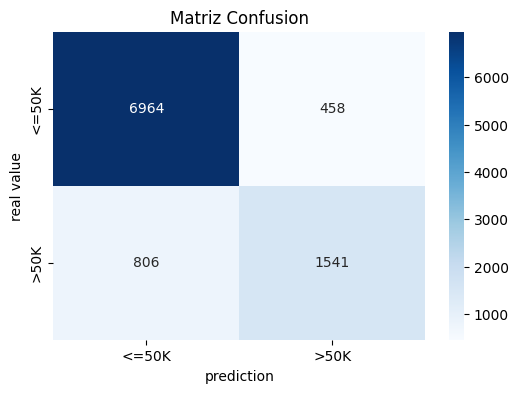

In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("prediction")
plt.ylabel("real value")
plt.title("Matriz Confusion")
plt.show()
